# Анализ данных для 6-ой задачи по НИР (18 вариант)

Для начала заимпортим необходимые библиотеки для нашего анализа данных.

In [82]:
import numpy as np # библиотека для эффективной работы с данными
import pandas as pd # библиотека для работы с наборами данных
import matplotlib.pyplot as plt # библиотека для визуализации
import seaborn as sns # еще одна библиотека для построения графиков

Прочтем данные из файла Excel.

In [94]:
data = pd.read_csv('C:\\Users\\Admin\\Desktop\\Speed_Dating_Data.csv', encoding = "ISO-8859-1")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


**Для выявления наименее желательных качеств в мужчине, нам необходимо взять новое подмножество с признаками качеств партнера.**

Просмотрев описание признаков набора данных из документа Word, я сделал вывод, что существует 5 качеств, по которым участники эксперимента оценивали, какие качества для них более/менее важны в партнере.

Признаки, по которым была осуществлена оценка партнеров в разные этапа эксперимента:

- attr - привлекательность
- sinc - искренность
- intel - интеллект
- fun - веселье
- amb - честолюбие
- shar - общие интересы/увлечения

Причем данные признаки в наборе данных с разными коэффициентами. Нас будут интересовать только те, которые описывают партнеров!

Это коэффициенты 1_3, 1_2, 1_s, 1_1.

Также возьмем в наше подмножество признак принадлежности к полу.

In [84]:
data_quality = data.loc[:,data.columns.isin(['gender',
                                             'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1','amb1_1', 'shar1_1',
                                             'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2','amb1_2', 'shar1_2',
                                             'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3','amb1_3', 'shar1_3',
                                             'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s','amb1_s', 'shar1_s'])]

data_quality = data_quality.dropna() # Исключим строки с пустыми значениями

data_quality.head() # Просмотр подмножества с преобразованными пустыми значениями

,gender,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr1_s,sinc1_s,intel1_s,...,intel1_2,fun1_2,amb1_2,shar1_2,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3
1851,0,12.77,19.15,17.02,17.02,14.89,19.15,12.77,17.02,19.15,...,17.39,17.39,15.22,17.39,11.36,18.18,18.18,18.18,15.91,18.18
1852,0,12.77,19.15,17.02,17.02,14.89,19.15,12.77,17.02,19.15,...,17.39,17.39,15.22,17.39,11.36,18.18,18.18,18.18,15.91,18.18
1853,0,12.77,19.15,17.02,17.02,14.89,19.15,12.77,17.02,19.15,...,17.39,17.39,15.22,17.39,11.36,18.18,18.18,18.18,15.91,18.18
1854,0,12.77,19.15,17.02,17.02,14.89,19.15,12.77,17.02,19.15,...,17.39,17.39,15.22,17.39,11.36,18.18,18.18,18.18,15.91,18.18
1855,0,12.77,19.15,17.02,17.02,14.89,19.15,12.77,17.02,19.15,...,17.39,17.39,15.22,17.39,11.36,18.18,18.18,18.18,15.91,18.18


Для ответа на вопрос: *Какие наименее желательные качеств в мужчине?* можно использовать группировку данных по признаку gender и вычисление средних значений остальных признаков. Затем можно отсортировать признаки по убыванию средних значений для женщин и выбрать наименьшие.

Такой подход будет верным, так как значения признаков присваиваются участниками в баллах.
То есть чем меньше среднее по признаку, тем менее важен этот признак партнеру.

In [85]:
# Подмножество женщин
woman_subset = data_quality.loc[data_quality['gender'] == 0]

# Вычисляем средние значения остальных признаков
mean_values = woman_subset.mean()

# Сортируем признаки по убыванию средних значений
sorted_values = mean_values.sort_values()

# Выбираем наименьшие значения
least_desirable_qualities = sorted_values[1:]

print(least_desirable_qualities)

amb1_s      12.904916
amb1_2      13.056389
amb1_1      13.138389
amb1_3      13.153589
shar1_1     13.646916
shar1_2     13.955095
shar1_s     13.997211
shar1_3     14.908358
fun1_s      14.915411
fun1_3      15.439368
fun1_2      15.992211
fun1_1      16.773516
sinc1_s     17.110874
sinc1_3     17.597947
attr1_1     17.881221
sinc1_2     18.165884
sinc1_1     18.653137
intel1_s    18.752853
intel1_3    18.995579
attr1_s     19.211747
intel1_2    19.260200
attr1_3     19.750463
intel1_1    19.907705
attr1_2     20.030105
dtype: float64


Отсюда, видим, что все девушки (женщины) считают наименее желательным качеством - честолюбие в парнях (мужчинах).
Следующим менее важным (желательным) качеством в парне (мужчине) девушки (женщины) считают общие интересы и увлечения.

Наоборот важными качествами для девушки (женщины) в мужчине является уровень интеллекта и привлекательность мужчины.

**Какие наименее желательные качества в женщине? Отличаются ли они от женского мнения?**

Проведем точно такой же анализ данных только для подмножества мужчин.

In [86]:
# Подмножество мужчин
male_subset = data_quality.loc[data_quality['gender'] == 1]

# Вычисляем средние значения остальных признаков
mean_values = male_subset.mean()

# Сортируем признаки по убыванию средних значений
sorted_values = mean_values.sort_values()

# Выбираем наименьшие значения
least_desirable_qualities = sorted_values[1:]

print(least_desirable_qualities)

amb1_2       9.360463
amb1_1       9.785046
amb1_s       9.867292
amb1_3      10.367222
shar1_1     10.552755
shar1_s     10.647894
shar1_2     10.863218
shar1_3     11.467326
sinc1_s     14.664664
sinc1_2     16.426354
intel1_s    16.487373
fun1_3      16.843299
fun1_s      16.874410
sinc1_1     17.036100
sinc1_3     17.383148
fun1_2      18.297141
intel1_3    18.337928
intel1_2    18.419618
intel1_1    18.716771
fun1_1      19.360127
attr1_1     24.550012
attr1_s     25.206447
attr1_2     26.321262
attr1_3     26.505417
dtype: float64


Отсюда, видим, что все парни (мужчины) считают наименее желательным качеством в девушках (женщинах) - честолюбие.
Следующим менее важным (желательным) качеством в девушках (женщинах) парни (мужчины) считают общие интересы и увлечения,
также как и девушки (женщины) в мужчине.

Делаем вывод, что женское мнения от мужского по части наименее желательных качеств в партнере не отличается.

А важными качествами для парня (мужчины) в девушке является привлекательность и чувство юмора.

**Являются ли общие интересы более важными, чем общее расовое происхождение?**

Для ответа на этот вопрос выделим новое подмножество из исходного набора данных, где возьмем признаки:
- dec
- samerace
- shar1_1
- shar1_s
- shar1_2
- shar1_3

In [87]:
data_race_or_shar = data.loc[:,data.columns.isin(['dec', 'samerace', 'shar1_1','shar1_2','shar1_3','shar1_s'])]

data_race_or_shar = data_race_or_shar.dropna() # Исключим строки с пустыми значениями

data_race_or_shar.head() # Просмотр подмножества с преобразованными пустыми значениями

,samerace,shar1_1,dec,shar1_s,shar1_2,shar1_3
1851,1,19.15,0,19.15,17.39,18.18
1852,0,19.15,0,19.15,17.39,18.18
1853,1,19.15,0,19.15,17.39,18.18
1854,0,19.15,0,19.15,17.39,18.18
1855,0,19.15,0,19.15,17.39,18.18


**Что важнее участникам: их общее расовое происхождение или их общие интересы?**

Проведем исследование, построив линейную регрессию, где целевая переменная будет объясняемой переменной, а ее регрессорами остальные признаки в подмножестве. 

In [88]:
from sklearn.model_selection import train_test_split

target = data_race_or_shar.dec
data_sel = data_race_or_shar.drop('dec', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(data_sel, target, test_size= 0.3, random_state=4477)

In [89]:
from sklearn.linear_model import LinearRegression

linmodel = LinearRegression()
model = linmodel.fit(x_train,y_train)

# Так как значения целевой переменной 0 и 1, а линейная регрессия,
# не предназнаяена для разбиения на два класса, делаем это самостоятельно.
# Все, что больше 0.5 = 1, что меньше = 0.

from sklearn import metrics

def linear_scorer(estimator, x, y):
    scorer_predictions = estimator.predict(x)

    scorer_predictions[scorer_predictions > 0.5] = 1
    scorer_predictions[scorer_predictions <= 0.5] = 0

    return metrics.accuracy_score(y, scorer_predictions)

linear_scorer(linmodel, x_test, y_test) # Выявление точности модели
print(model.coef_) # Просмотр коэффициентов линейной регрессии

[-0.01810194 -0.00292448 -0.00015589  0.00585048  0.00377909]


Точность у данной линейной регрессии хорошая, а именно 53 %, значит зависимость между объясняемой переменной и регрессорами присутствует.

Оценивая коэффициенты данной модели можем сказать, что принадлежность одной расе (участика и его парнера) очень влияет на решение участника в отличие от общих интересов партнеров.

Делаем вывод, что общее расовое происхождение важнее участникам, чем их общие интересы

**Произвести кластеризацию, выявить аномальные случаи. Что в них особенного?**

Производить кластеризацию будем на всем наборе данных, поэтому для начала приведем его к рабочему виду.

In [95]:
data = data.drop(['match', 'dec_o', 'iid', 'id', 'field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income', 'career'], axis=1)

# подсчет количества пропущенных значений в каждом столбце
missing_values_count = data.isna().sum()

# получение списка столбцов, в которых количество пропущенных значений больше 4000
columns_to_drop = list(missing_values_count[missing_values_count > 4000].index)

# удаление столбцов из таблицы
data = data.drop(columns=columns_to_drop)

# удаление всех пустых значений в каждом столбце
data = data.dropna()

# вывод обновленной таблицы
print(data)

      gender  idg  condtn  wave  round  position  positin1  order  partner  \
3409       0    1       1    10      9         8       8.0      4        2   
3413       0    1       1    10      9         8       8.0      3        6   
3414       0    1       1    10      9         8       8.0      5        7   
3415       0    1       1    10      9         8       8.0      1        8   
3418       0    3       1    10      9         1       1.0      6        2   
...      ...  ...     ...   ...    ...       ...       ...    ...      ...   
8367       1   44       2    21     22         9      10.0     22       12   
8368       1   44       2    21     22         8      10.0     21       13   
8369       1   44       2    21     22         4      10.0     17       14   
8370       1   44       2    21     22         5      10.0     18       15   
8377       1   44       2    21     22         2      10.0     15       22   

        pid  ...  sinc2_2  intel2_2  fun2_2  amb2_2  shar2_2  a

Попробуем воспользоваться методом PCA для снижения размерности.

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

for i in range(data.shape[1] + 1): 
    pca2 = PCA(n_components = i)
    pca2.fit(data)
    print(i, sum(pca2.explained_variance_ratio_))

0 0
1 0.7403371097105373
2 0.8020180173327598
3 0.8278988959196985
4 0.8432684421386915
5 0.8560703590291434
6 0.8686468486050883
7 0.8798351627094184
8 0.8906416686456051
9 0.8989993922768336
10 0.906297769748573
11 0.9119444626572055
12 0.9174113989612865
13 0.9223079967617626
14 0.9267453968659245
15 0.9309932339662176
16 0.9349426606773255
17 0.938731038384429
18 0.9423120172677104
19 0.9455084142063419
20 0.9486752718884854
21 0.9516390901224921
22 0.9542659701417152
23 0.9567820903301965
24 0.9592256911469864
25 0.9614803739912784
26 0.9637174423513867
27 0.9657588475785099
28 0.9677559193742209
29 0.9696101287697556
30 0.9712701907218748
31 0.9728503477075842
32 0.9743379921169115
33 0.9758089302889067
34 0.977173715945154
35 0.9784573057665451
36 0.9797448165363412
37 0.9808832357732925
38 0.9819784685324573
39 0.9830542143091513
40 0.9840060951587911
41 0.9849500247200511
42 0.9858594480184653
43 0.9867172743844652
44 0.9875255706665466
45 0.9882867756826897
46 0.9889926745900

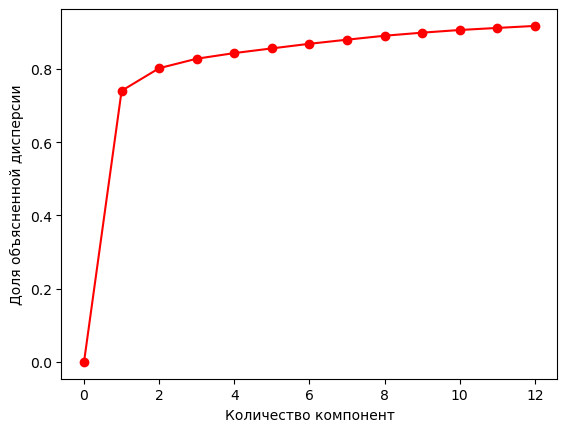

In [55]:
import matplotlib.pyplot as plt

x = range(13)
y = [0, 0.7403156919379744, 0.8019949480534895, 0.8278750970521416, 0.8432442238303203, 0.856045823306342, 0.8686220381111169, 0.8798100562670698, 0.8906162631507597, 0.8989738598212641, 0.9062720998116164, 0.9119188483557351, 0.9173855501314454]


plt.plot(x, y, 'ro-')

plt.xlabel('Количество компонент')
plt.ylabel('Доля объясненной дисперсии')


plt.show()

Отсюда видим, что 90% дисперсии объясняется 10-ю компонентами.

**Попробуем применить алгоритмы кластеризации и найти какие-нибудь кластеры.**

Для начала попробуем найти кластеры, с помощью DBSCAN.

In [92]:
# Нормализуем данные

scaler = StandardScaler()
data = scaler.fit_transform(data)

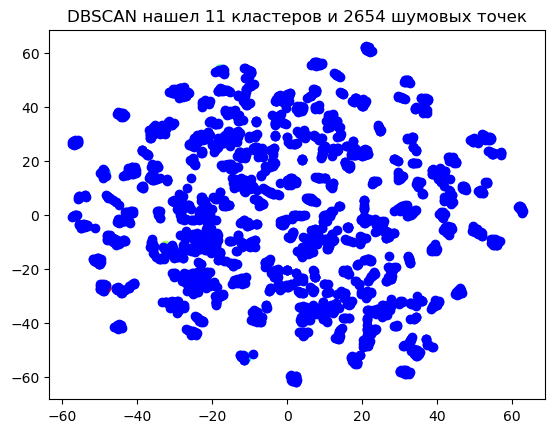

In [93]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

#снизим размерность данных при помощи метода главных компонент
pca = PCA(n_components=10).fit(data)
pdata = pca.transform(data)

#используем dbscan для обнаружения кластеров
dbscan = DBSCAN(eps = 1, min_samples=5)
dbscan.fit(pdata)
labels = dbscan.labels_

#используем tsne для снижения размерности
tsne = TSNE()
pca_2d = tsne.fit_transform(pdata)

#визуализируем кластеры
for label in set(labels):
    if label == -1:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color='blue')
    else:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color=plt.cm.jet(label / np.max(labels + 1)))

plt.title('DBSCAN нашел {} кластеров и {} шумовых точек'.format(len(set(labels)) - (1 if -1 in labels else 0), np.sum(labels == -1)))
plt.show()

Отсюда видим, что в наборе данных отсутствуют явно выраженные кластеры, и DBSCAN не смог разбить их на отдельные группы.

Попробуем применить алгоритм K-means для поиска кластеров.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


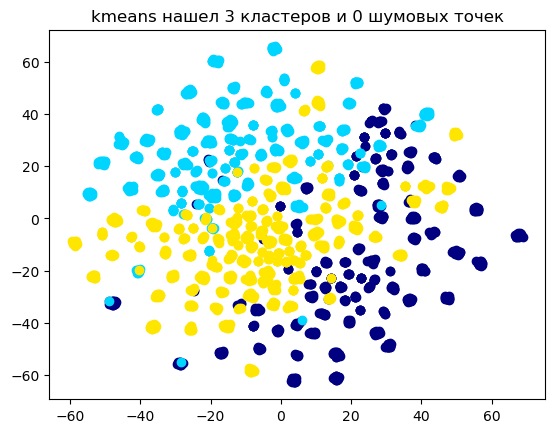

In [28]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters=3, n_init = 'auto', random_state = 157)
kmeans.fit(data)
labels = kmeans.labels_

tsne = TSNE()
pca_2d = tsne.fit_transform(data)

for label in set(labels):
    if label == -1:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color='blue')
    else:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color=plt.cm.jet(label / np.max(labels + 1)))

plt.title('kmeans нашел {} кластеров и {} шумовых точек'.format(len(set(labels)) - (1 if -1 in labels else 0), np.sum(labels == -1)))
plt.show()

При различном указывании количества кластеров в параметрах Kmeans, этот метод кластеризации всегда будет находить столько кластеров, сколько было указано.

*Отсюда можем сделать вывод, что в нашем наборе данных четко выраженных кластеров нет.*

Скорее всего кластеры не выделяются, потому что в нашем наборе данных слишком много пустых значений (так как каждый
участник имел хотя бы одно пустое значение). Поэтому при удалении столбцов со многими пропусками, участников стало сложно
группировать по каким-либо группам.

**Попробуем применить классификатор - SGDClassifier (метод опорных векторов), чтобы попробовать разделить нашу выборку на два класса с максимальным зазором между ними гиперплоскостью.**

In [98]:
from sklearn.model_selection import train_test_split

target = data.dec
data_sel = data.drop('dec', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(data_sel, target, test_size= 0.3, random_state=4477)

In [61]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(x_train,y_train)
clf
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

#Оценим точность построенного классификатора с помощью метрик accuracy, precision, recall и F1 на тестовой выборке.
import sklearn.metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84       465
           1       0.91      0.56      0.69       352

    accuracy                           0.79       817
   macro avg       0.83      0.76      0.76       817
weighted avg       0.81      0.79      0.77       817



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Отсюда видно, что точность у нашего классификатора неплохая, исходя из метрик f1, precision, recall, accuracy, поэтому данный классификатор помогает разделить нашу выборку на 2 класса.

<Axes: >

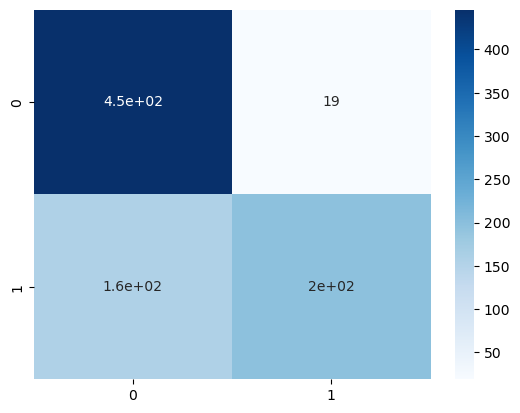

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

*С помощью матрицы ошибок мы увидели, что:*

- True positives (TP) (количество правильно определенных объектов, которые действительно относятся к данному классу) - большое множество;
- False positives (FP) (количество неправильно определенных объектов, которые были отнесены к данному классу, но по факту не относятся к нему) - пустое множество;
- False negatives (FN) (количество неправильно определенных объектов, которые не были отнесены к данному классу, но по факту относятся к нему) - большое множество;
- True negatives (TN) (количество правильно определенных объектов, которые не относятся к данному классу) - большое множество.


*Исходя из данной информации из матрицы ошибок, можно сделать следующие выводы:*

1. Модель правильно идентифицировала большое количество объектов, относящихся к данному классу (True Positives), что свидетельствует о высокой чувствительности (recall) модели к данному классу.
2. Модель неправильно идентифицировала 19 объектов, не относящихся к данному классу (False Positives), что свидетельствует о высокой точности (precision) модели при определении данного класса.
3. Модель неправильно идентифицировала большое количество объектов, которые фактически относятся к данному классу, но были отнесены к другим классам (False Negatives), что свидетельствует о низкой чувствительности (recall) модели к данному классу.
4. Модель правильно идентифицировала все объекты, которые не относятся к данному классу (True Negatives), что также свидетельствует о высокой точности (precision) модели при определении объектов, не относящихся к данному классу.

**Попробуем применить классификатор - LogisticRegression (логистическую регрессию), чтобы предсказать вероятность принадлежности объекта к одному из двух классов на основе входных признаков.**

In [63]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

# обучение модели на обучающей выборке
clf.fit(x_train, y_train)

# предсказание классов на тестовой выборке
y_pred = clf.predict(x_test)

# оценка точности модели на тестовой выборке
clf.score(x_test, y_test)

import sklearn.metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       465
           1       0.81      0.83      0.82       352

    accuracy                           0.84       817
   macro avg       0.84      0.84      0.84       817
weighted avg       0.84      0.84      0.84       817



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Отсюда видно, что точность у нашего классификатора неплохая, исходя из метрик f1 и recall, поэтому данный классификатор помогает предсказать вероятность принадлежности объекта к одному из двух классов на основе входных признаков.

**Попробуем применить классификатор - DecisionTree (решающее дерево), чтобы построить модель предсказания на основе дерева решений.**

Найдем лучшую высоту дерева.

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#используем решающее дерево
for i in range(1, 20):
    T = DecisionTreeClassifier(random_state=338, max_depth = i)
    T = T.fit(x_train, y_train)
    print(str(i) + ": " + str(T.score(x_test, y_test)))

1: 0.7662178702570379
2: 0.7527539779681762
3: 0.784577723378213
4: 0.7760097919216646
5: 0.769889840881273
6: 0.769889840881273
7: 0.7931456548347613
8: 0.7858017135862914
9: 0.7796817625458996
10: 0.7796817625458996
11: 0.7711138310893513
12: 0.7747858017135862
13: 0.7576499388004896
14: 0.7600979192166463
15: 0.769889840881273
16: 0.7649938800489596
17: 0.7576499388004896
18: 0.7711138310893513
19: 0.7637698898408812


В нашем случае лучшая высота дерева - 3, так как последующие увеличения ухудшают точность классификатора.

Далее посмотрим на точность нашего классификатора, оценив его по меткам accuracy, recall, precision, f1.

In [100]:
from sklearn.metrics import classification_report

T = DecisionTreeClassifier(random_state=338, max_depth = 3)
T = T.fit(x_train, y_train)

pred = T.predict(x_test)
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       465
           1       0.78      0.70      0.74       352

    accuracy                           0.78       817
   macro avg       0.78      0.77      0.78       817
weighted avg       0.78      0.78      0.78       817



Так как значения всех метрик высокие, делаем вывод, что решающее дерево очень точно предсказывает, на чем основано решение участников.

С помощью визуального просмотра классификатора и анализа вопросов, которые задает дерево, оценим, какие признаки влияют в большей мере на решение участников.

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Визуализация решающего дерева
plt.figure(figsize=(200, 100))
plot_tree(T, feature_names=x_train.columns,  class_names=["0", "1"],  filled=True, rounded=True)
plt.show()

Опишем характеристики некоторых объектов класса 1. like > 6.25, attr > 6.5, shar2_1 <= 27.5 

Опишем характеристики некоторых объектов класса 0. like <= 6.25, sinc5_1 > 4.5